## Project : Holiday weather

After the stress of the last year, I need to take a holiday. In this project I am going to predict two good weather weeks to take off as holiday in Beijing. I need to explore these beaches *Shanhaiguan, Bohai Bay and Beidaihe Scenic Area*. Of course the weather in the summer of 2014 may be very different to 2021 but it should give some indication of when would be a good time to take a summer break.

## Getting the data
The instructed method to retrieve data was unattainable. The website has been restructured and as such could not successfully retrieve dataset.

I retrieved the Beijing 2014 data from the repository pulled and used it for the assessment.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
from datetime import datetime
beijing = pd.read_csv('Beijing_PEK_2014.csv', skipinitialspace=True)
beijing.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,12,4,-2,-12,-17,-20,44,19,7,...,31,11,5,32,16,47.0,0.0,NaN,NaN,291<br />
1,2014-1-2,7,0,-6,-6,-9,-13,74,50,28,...,18,7,3,18,5,NaN,0.0,NaN,NaN,20<br />
2,2014-1-3,9,3,-2,-7,-13,-18,64,32,9,...,31,13,5,18,8,NaN,0.0,NaN,NaN,24<br />
3,2014-1-4,2,-2,-6,-4,-7,-9,80,68,44,...,10,5,2,11,5,NaN,0.0,2.0,NaN,56<br />
4,2014-1-5,7,0,-7,-5,-11,-15,80,51,15,...,31,7,3,18,10,NaN,0.0,NaN,NaN,18<br />


In [2]:
beijing.columns

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

## Cleaning the data
First we need to clean up the data. I'm not going to make use of 'WindDirDegrees' in my analysis, but you might in yours so we'll rename 'WindDirDegrees< br />' to 'WindDirDegrees'.

In [3]:
beijing = beijing.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the < br /> html line breaks from the values in the 'WindDirDegrees' column.

In [4]:
beijing['WindDirDegrees'] = beijing['WindDirDegrees'].str.rstrip('<br />')

and change the values in the 'WindDirDegrees' column to float64:

In [5]:
beijing['WindDirDegrees'] = beijing['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the 'GMT' column into values of the datetime64 date type.

In [6]:
beijing['Date'] = pd.to_datetime(beijing['Date'])

We also need to change the index from the default to the datetime64 values in the 'Date' column so that it is easier to pull out rows between particular dates and display more meaningful graphs:

In [7]:
beijing['Date'] = pd.to_datetime(beijing['Date'])
beijing.dtypes

Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

In [8]:
beijing.index = beijing['Date']

## Finding a summer break
According to meteorologists, summer extends for the whole months of Mid May to Mid September in Beijing. I'm going to create a dataframe that holds just those months using the datetime index.

In [9]:
summer = beijing.loc[datetime(2014,5,15) : datetime(2014,9,15)]
summer.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-15,2014-05-15,29,18,8,7,4,-2,76,37,9,...,23,10,8,26,8,47.0,0.0,NaN,NaN,92.0
2014-05-16,2014-05-16,30,22,14,9,4,-1,67,31,8,...,31,19,6,26,10,NaN,0.0,NaN,NaN,72.0
2014-05-17,2014-05-17,28,21,14,10,6,3,67,36,14,...,26,14,8,26,8,NaN,0.0,NaN,Rain,150.0
2014-05-18,2014-05-18,30,21,13,14,9,6,72,41,20,...,11,8,6,26,8,40.0,0.0,1.0,Rain,151.0
2014-05-19,2014-05-19,28,22,17,17,15,12,94,64,28,...,10,7,3,21,10,NaN,0.0,4.0,Rain-Thunderstorm,106.0


I now look for the days with warm temperatures.

In [10]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-22,2014-05-22,35,27,19,18,14,8,88,48,12,...,14,4,2,29,11,NaN,0.00,NaN,NaN,167.0
2014-05-23,2014-05-23,34,27,20,16,13,9,73,40,16,...,14,8,5,29,11,40.0,0.00,NaN,Rain,175.0
2014-05-28,2014-05-28,37,26,15,12,7,1,68,28,6,...,27,19,6,35,10,50.0,0.00,NaN,NaN,189.0
2014-05-29,2014-05-29,42,30,18,15,11,3,68,33,5,...,31,14,10,21,6,43.0,0.00,2.0,NaN,72.0
2014-05-30,2014-05-30,35,28,20,15,13,10,60,37,21,...,13,9,7,21,10,NaN,0.00,NaN,NaN,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-23,2014-08-23,33,27,22,23,21,16,94,69,40,...,10,5,2,26,6,32.0,0.51,5.0,Rain-Thunderstorm,155.0
2014-08-24,2014-08-24,33,27,22,20,16,9,88,56,18,...,31,14,6,21,10,29.0,0.25,1.0,Rain,39.0
2014-08-26,2014-08-26,36,26,16,15,10,3,83,41,7,...,31,19,6,14,6,21.0,0.00,NaN,NaN,28.0


Summer 2014 is rather hot in Beijing: there are over 70 days with temperatures of 30 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

Now let's plot the 'Mean TemperatureC' for the summer:

<AxesSubplot:xlabel='Date'>

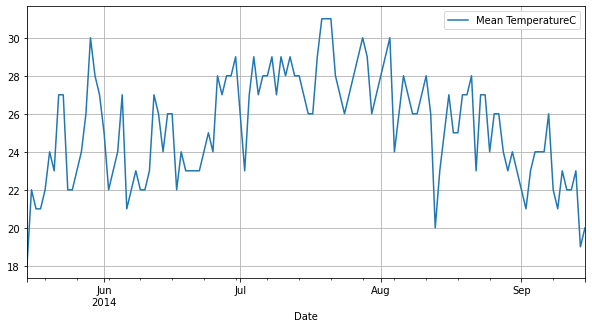

In [11]:
summer[['Mean TemperatureC']].plot(grid=True, figsize=(10,5))

Well looking at the graph late May, July to early August looks good for mean temperatures over 28 degrees C so let's also put precipitation on the graph too:

<AxesSubplot:xlabel='Date'>

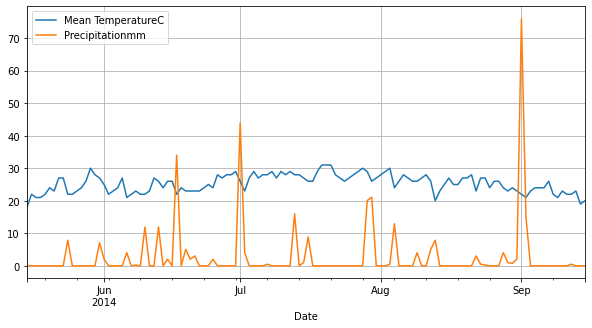

In [12]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Mid May to early June is looking good, with just two peaks showing light rain. Let's have a closer look by just plotting mean temperature and precipitation for Mid May to early June.

<AxesSubplot:xlabel='Date'>

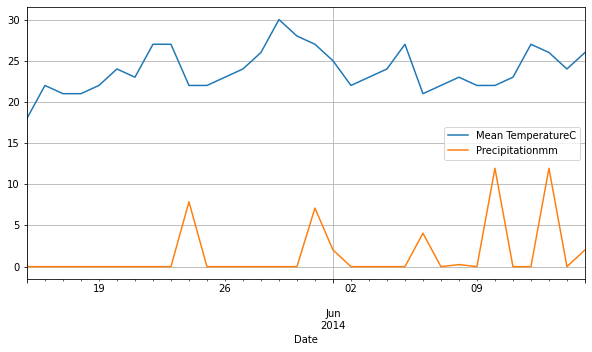

In [13]:
may_june = summer.loc[pd.datetime(2014,5,15) : pd.datetime(2014,6,15)]
may_june[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

I think I'll zoom further into May, the rain peak is a little lower than that of June

<AxesSubplot:xlabel='Date'>

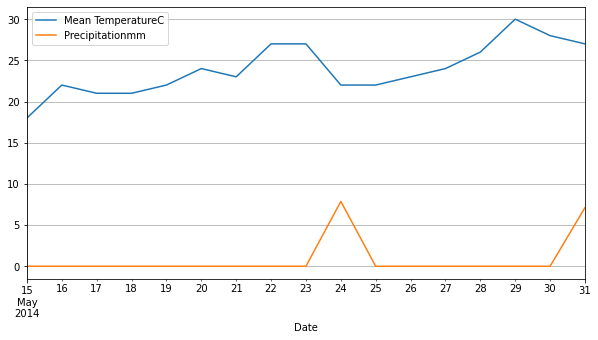

In [14]:
may = summer.loc[pd.datetime(2014,5,15) : pd.datetime(2014,5,31)]
may[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Perfect! Mid May looks pretty good, just one day that has significant rain, the 23rd and the 25th and the temperatures for those days are above 20 degrees. Perfect Month for a vacation.

###### *Let me go pack my bags! Beijing Awaits*

## Conclusions
The graphs have shown the volatility of an Indian's summer (Beijing), but at least over 4 weeks were found when the weather wasn't  bad in 2014. 